In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

raw_dfp = pd.read_csv('Doppler_Free_Peak_T1.CSV',header=None)
raw_dfp

,0,1,2,3,4,5
0,Record Length,2.500000e+03,NaN,0.04150,-0.038,NaN
1,Sample Interval,1.000000e-05,NaN,0.04151,-0.038,NaN
2,Trigger Point,-4.150000000000e+03,NaN,0.04152,-0.038,NaN
3,NaN,NaN,NaN,0.04153,-0.038,NaN
4,NaN,NaN,NaN,0.04154,-0.038,NaN
...,...,...,...,...,...,...
2495,NaN,NaN,NaN,0.06645,0.022,NaN
2496,NaN,NaN,NaN,0.06646,0.024,NaN
2497,NaN,NaN,NaN,0.06647,0.024,NaN
2498,NaN,NaN,NaN,0.06648,0.024,NaN


In [2]:
t_dfp = raw_dfp[3]
V_dfp = raw_dfp[4]

In [3]:
t_data = np.array(t_dfp)
V_data = np.array(V_dfp)

Text(0, 0.5, 'Voltage (V)')

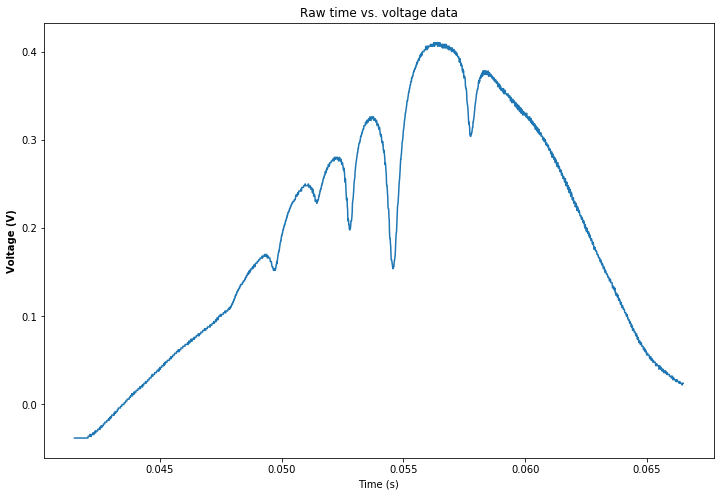

In [4]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(t_data, V_data)

ax.set_title('Raw time vs. voltage data')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)', fontsize=10, fontweight='bold')

In [5]:
cal_dfp = pd.read_csv('Michelson_Interferometer_data_on_Peak.CSV',header=None)
cal_dfp

,0,1,2,3,4,5
0,Record Length,2.500000e+03,NaN,0.00800,-0.20,NaN
1,Sample Interval,4.000000e-05,NaN,0.00804,-0.20,NaN
2,Trigger Point,-2.000000000000e+02,NaN,0.00808,-0.20,NaN
3,NaN,NaN,NaN,0.00812,-0.20,NaN
4,NaN,NaN,NaN,0.00816,-0.20,NaN
...,...,...,...,...,...,...
2495,NaN,NaN,NaN,0.10780,0.84,NaN
2496,NaN,NaN,NaN,0.10784,0.84,NaN
2497,NaN,NaN,NaN,0.10788,0.84,NaN
2498,NaN,NaN,NaN,0.10792,0.84,NaN


In [6]:
t_dfp_cal = cal_dfp[3]
V_dfp_cal = cal_dfp[4]

In [7]:
t_cal_data = np.array(t_dfp_cal)
V_cal_data = np.array(V_dfp_cal)
print(t_cal_data)
print(V_cal_data)

[0.008   0.00804 0.00808 ... 0.10788 0.10792 0.10796]
[-0.2  -0.2  -0.2  ...  0.84  0.84  0.84]


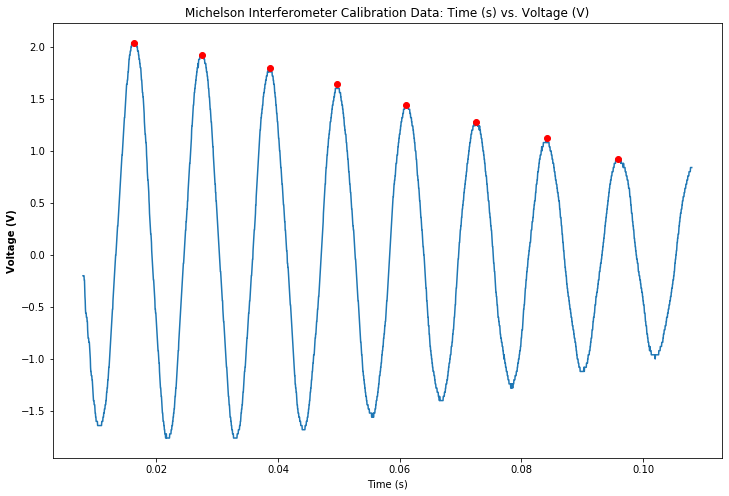

In [86]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(t_cal_data, V_cal_data)

ax.set_title('Michelson Interferometer Calibration Data: Time (s) vs. Voltage (V)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)', fontsize=10, fontweight='bold')

cal_p1 = [0.016380000000, 2.04000]
cal_p2 = [0.027520000000, 1.92000]
cal_p3 = [0.038640000000, 1.80000]
cal_p4 = [0.049720000000, 1.64000]
cal_p5 = [0.061120000000, 1.44000]
cal_p6 = [0.072480000000, 1.28000]
cal_p7 = [0.084160000000, 1.12000]
cal_p8 = [0.095880000000, 0.92000]

ax.plot(cal_p1[0], cal_p1[1], marker='o', color='red')
ax.plot(cal_p2[0], cal_p2[1], marker='o', color='red')
ax.plot(cal_p3[0], cal_p3[1], marker='o', color='red')
ax.plot(cal_p4[0], cal_p4[1], marker='o', color='red')
ax.plot(cal_p5[0], cal_p5[1], marker='o', color='red')
ax.plot(cal_p6[0], cal_p6[1], marker='o', color='red')
ax.plot(cal_p7[0], cal_p7[1], marker='o', color='red')
ax.plot(cal_p8[0], cal_p8[1], marker='o', color='red')



In [88]:
# now, using the cal values, we can calibrate the spectra because each peak corresponds to a moment of absolute constructive
# interference.  At these points, L=n\lambda = d1 - d2.  So, we can find the rate of change in frequency

# set up the vector:

cal_array_time = [cal_p1[0], cal_p2[0], cal_p3[0], cal_p4[0], cal_p5[0], cal_p6[0], cal_p7[0], cal_p8[0]]
cal_array_v = [cal_p1[1], cal_p2[1], cal_p3[1], cal_p4[1], cal_p5[1], cal_p6[1], cal_p7[1], cal_p8[1]]

c = 2.998*10**8 # m/s

# so, time stays the same, and we just need the differences in the michelson interferometer to get what we need
# 
d1 = 0.444 # m 
d_d1 = 0.002 # m

d2 = 0.0127
d_d2 = 0.002 #m

L = d1 - d2
dL = d_d1 + d_d2


# in the future, we can calculate the uncertainty by using the total uncertainty from the subtraction and then doing the division

freq_vector = [0]*8

for i in range(0,8):
    freq_vector[i] = ((i)*c)/(2*L)
    
freq_vector_array = np.array(freq_vector)
print(freq_vector_array)


cal_array_time_array = np.array(cal_array_time)
print('this is the uncertainty:')
print(cal_array_time_array)

del_nu = 2.998*10**8 / 2*(L)

d_del_nu = del_nu * (dL / L)

print('this is del nu')
print(del_nu)
print('this is the uncertainty in del nu')
print(d_del_nu)

del_t = [0]*7

del_t[0] = cal_array_time_array[1] - cal_array_time_array[0]

for i in range(0,7):
    del_t[i] = cal_array_time_array[i+1] - cal_array_time_array[i]


print('del t array')
print(del_t)

del_t_array = np.array(del_t)
print(del_t_array)

slope_vector = del_nu / del_t_array
print('slope vector')
print(slope_vector)

d_slope_vector = slope_vector * (d_del_nu / del_nu + (0.00001)/ del_t_array)
print('uncertainty in the slope:')
print(d_slope_vector)

best_slope_value = sum(slope_vector) / 7
best_slope_uncertainty = sum(d_slope_vector) / 7

print(' ')

print('best slope value: ')
print(best_slope_value)

print('best slope uncertainty')
print(best_slope_uncertainty)

[0.00000000e+00 3.47553907e+08 6.95107814e+08 1.04266172e+09
 1.39021563e+09 1.73776953e+09 2.08532344e+09 2.43287735e+09]
this is the uncertainty:
[0.01638 0.02752 0.03864 0.04972 0.06112 0.07248 0.08416 0.09588]
this is del nu
64651870.0
this is the uncertainty in del nu
599600.0
del t array
[0.01114, 0.011120000000000001, 0.01108, 0.0114, 0.011360000000000002, 0.011679999999999996, 0.011720000000000008]
[0.01114 0.01112 0.01108 0.0114  0.01136 0.01168 0.01172]
slope vector
[5.80357899e+09 5.81401709e+09 5.83500632e+09 5.67121667e+09
 5.69118574e+09 5.53526284e+09 5.51637116e+09]
uncertainty in the slope:
[59033733.38834291 59149295.94094508 59381774.65495446 57571242.69005848
 57791536.74246182 56074711.33772755 55867210.88772143]
 
best slope value: 
5695234115.373294
best slope uncertainty
57838500.806030236


these are the time values:
[0.01638 0.02752 0.03864 0.04972 0.06112 0.07248 0.08416 0.09588]
these are the frequency values:
[0.00000000e+00 3.47553907e+08 6.95107814e+08 1.04266172e+09
 1.39021563e+09 1.73776953e+09 2.08532344e+09 2.43287735e+09]
these are the uncertainties:
[       0.          3223314.69319189  6446629.38638377  9669944.07957566
 12893258.77276755 16116573.46595944 19339888.15915132 22563202.85234321]


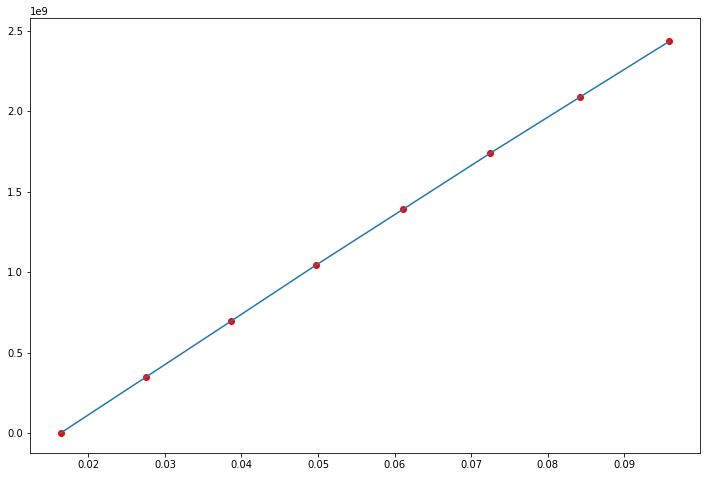

In [46]:
d_freq_vector_array = freq_vector_array * (dL / L)


fig,ax = plt.subplots(figsize = (12,8))
ax.errorbar(cal_array_time_array, freq_vector_array, d_freq_vector_array)

for i in range(0,8):
    ax.plot(cal_array_time[i], freq_vector[i], marker='o', color='red')

#need to find uncertainties

print('these are the time values:')
print(cal_array_time_array)

print('these are the frequency values:')
print(freq_vector_array)

print('these are the uncertainties:')
print(d_freq_vector_array)

In [47]:
def linear(p, xvar):
    return p[0] + p[1]*xvar

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

# The code below defines our data fitting function.
# Inputs are:
# initial guess for parameters p0
# the function we're fitting to
# the x,y, and dy variables
# tmi can be set to 1 or 2 if more intermediate data is needed

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0, np.zeros_like(p0), -1, -1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf), -1, -1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(np.diagonal(cov)) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq, dof

#418*10^8
#41800000000

print("Linear Fit")
guess = [9.949e+01, 3.122e+01]
pf, pferr, chisq, dof = data_fit(guess,linear, cal_array_time_array, freq_vector_array, d_freq_vector_array)

Linear Fit
Something has gone wrong: Residuals are not finite in the initial point.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


NameError: name 't' is not defined

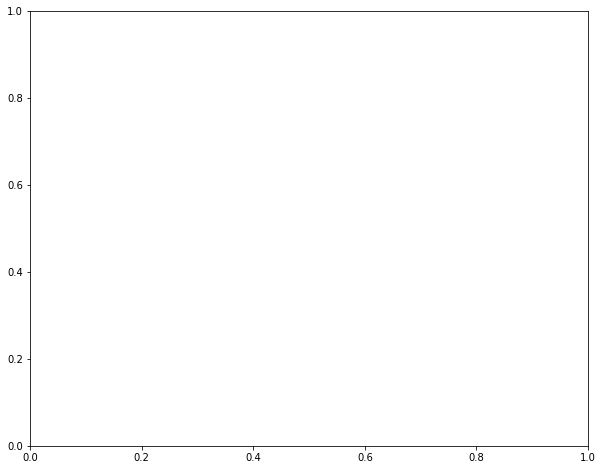

In [68]:
fig, ax = plt.subplots(figsize = (10,8))
ax.errorbar(t, A, dA, fmt='k.', label = "Data")
t_cont = np.linspace(min(t), max(t), 200) 
  # This makes it so we get a smooth plot rather than only the function evaluated exactly at our data points
  # It isn't strictly needed for a straight line, but it will make other functions look much nicer
ax.plot(t_cont, linear(pf, t_cont), label = "Linear fit")
ax.legend()

Text(0, 0.5, 'Voltage (V)')

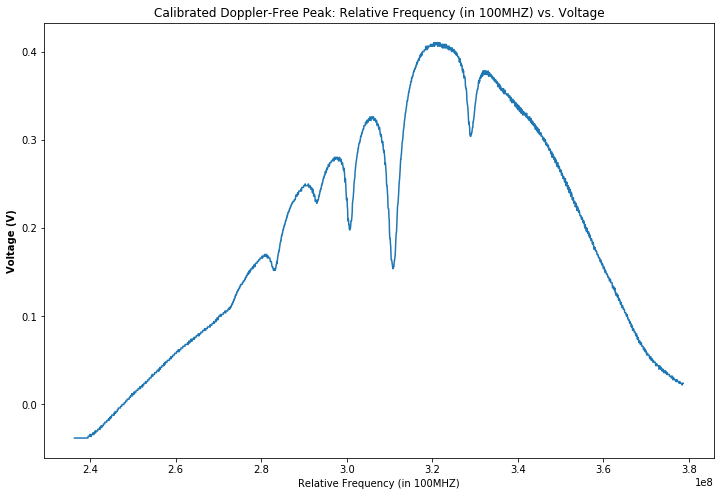

In [84]:
t_data = np.array(t_dfp)
V_data = np.array(V_dfp)

f_calibrated = best_slope_value * t_data

fig,ax = plt.subplots(figsize = (12,8))
ax.plot(f_calibrated, V_data)

ax.set_title('Calibrated Doppler-Free Peak: Relative Frequency (in 100MHZ) vs. Voltage')
ax.set_xlabel('Relative Frequency (in 100MHZ)')
ax.set_ylabel('Voltage (V)', fontsize=10, fontweight='bold')

In [71]:
# now it makes sense to subtract the shifted doppler 
# 

raw_dp = pd.read_csv('Doppler Broadened Peak.CSV',header=None)
raw_dp

,0,1,2,3,4,5
0,Record Length,2.500000e+03,NaN,0.04150,-0.0136,NaN
1,Sample Interval,1.000000e-05,NaN,0.04151,-0.0136,NaN
2,Trigger Point,-4.150000000000e+03,NaN,0.04152,-0.0136,NaN
3,NaN,NaN,NaN,0.04153,-0.0136,NaN
4,NaN,NaN,NaN,0.04154,-0.0136,NaN
...,...,...,...,...,...,...
2495,NaN,NaN,NaN,0.06645,0.0328,NaN
2496,NaN,NaN,NaN,0.06646,0.0336,NaN
2497,NaN,NaN,NaN,0.06647,0.0344,NaN
2498,NaN,NaN,NaN,0.06648,0.0344,NaN


Text(0, 0.5, 'Voltage (V)')

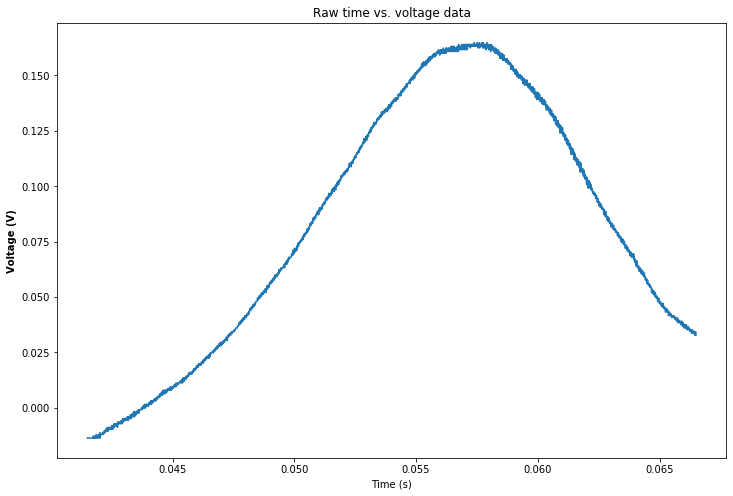

In [72]:
t_dp = raw_dp[3]
V_dp = raw_dp[4]

t_dp_data = np.array(t_dp)
V_dp_data = np.array(V_dp)

fig,ax = plt.subplots(figsize = (12,8))
ax.plot(t_dp_data, V_dp_data)

ax.set_title('Raw time vs. voltage data')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)', fontsize=10, fontweight='bold')

Text(0, 0.5, 'Voltage (Volts)')

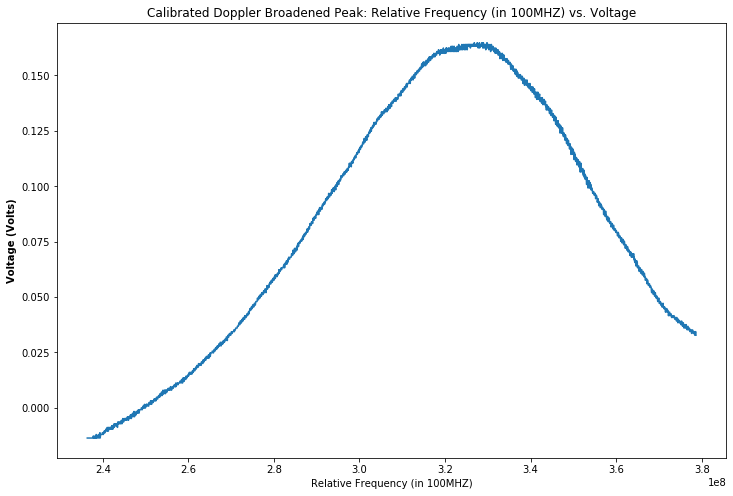

In [83]:
f_dp_data = t_dp_data * best_slope_value

fig,ax = plt.subplots(figsize = (12,8))
ax.plot(f_dp_data, V_dp_data)

ax.set_title('Calibrated Doppler Broadened Peak: Relative Frequency (in 100MHZ) vs. Voltage')
ax.set_xlabel('Relative Frequency (in 100MHZ)')
ax.set_ylabel('Voltage (Volts)', fontsize=10, fontweight='bold')

Text(0, 0.5, 'Voltage (V)')

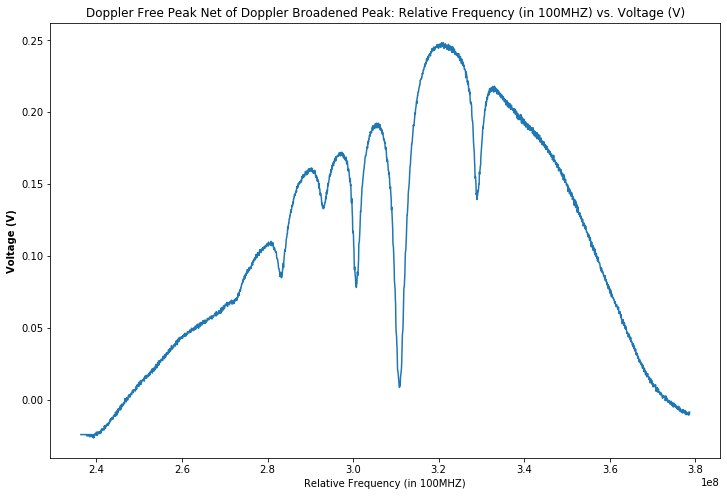

In [85]:
V_net = V_data - V_dp_data

fig,ax = plt.subplots(figsize = (12,8))
ax.plot(f_calibrated, V_net)

ax.set_title('Doppler Free Peak Net of Doppler Broadened Peak: Relative Frequency (in 100MHZ) vs. Voltage (V)')
ax.set_xlabel('Relative Frequency (in 100MHZ)')
ax.set_ylabel('Voltage (V)', fontsize=10, fontweight='bold')

In [ ]:
#now need to isolate the peaks and decide which are crossovers

